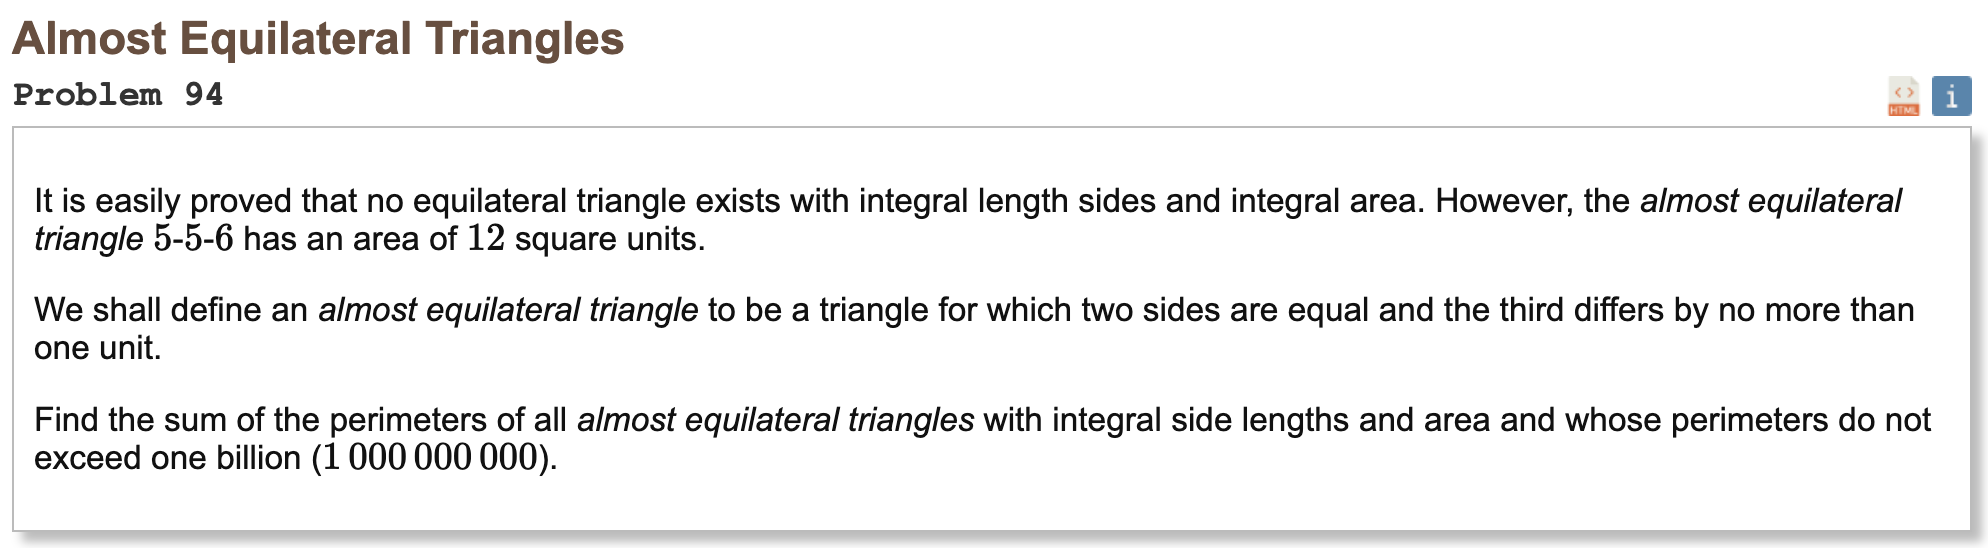

## Initial approach

* check if the trianlgle is almost equiteral
* calculate perimeter
* check 5-5-6 case

In [1]:
import math

def is_almost_equilateral(a, b, c):
    return (a == b and abs(c - a) == 1) or (a == c and abs(b - a) == 1) or (b == c and abs(a - b) == 1)

def area(a, b, c):
    s = (a + b + c) / 2
    return math.sqrt(s * (s - a) * (s - b) * (s - c))


In [2]:
a, b, c = 5, 5, 6

if is_almost_equilateral(a, b, c):
    triangle_area = area(a, b, c)
    if triangle_area.is_integer():
        print(f"{a}-{b}-{c} triangle has integer area: {triangle_area}")
    else:
        print(f"{a}-{b}-{c} triangle has non-integer area: {triangle_area}")
else:
    print("Not an almost equilateral triangle")

5-5-6 triangle has integer area: 12.0


* now try case that perimeters do not exceed 1 billion

```python

%%time

def is_square(n):
    return int(math.isqrt(n))**2 == n

total = 0
limit = 1_000_000_000

for side in range(2, limit // 3 + 1):
    for diff in [-1, 1]:
        a = side
        b = side
        c = side + diff
        p = a + b + c
        if p > limit:
            continue
        if is_almost_equilateral(a, b, c):
            s = p // 2
            area_squared = s * (s - a) * (s - b) * (s - c)
            if area_squared > 0 and is_square(area_squared):
                total += p

print("Result:", total)
````

* this code tries millions of triangles, so it works too slow.
* lets change the approach

In [3]:
%%time

a = 2
b = 1
total = 0
limit = 1_000_000_000

while True:
    side = 2 * a * b
    base = a * a - b * b
    perim = 2 * side + base
    if perim > limit:
        break
    area = base * math.sqrt(side**2 - (base // 2)**2) / 2
    if area.is_integer():
        total += perim
    a, b = 2 * a + b, a + b

print("Result:", total)

Result: 370248451
CPU times: user 58 μs, sys: 6 μs, total: 64 μs
Wall time: 59.8 μs
